__Testing the implementation of pseudo Ellipitical NFW deflection angle.__

The references are:
1. [Pseudo Elliptical Models]    - https://www.aanda.org/articles/aa/pdf/2012/08/aa18485-11.pdf
2. [Pseudo Elliptical NFW model] - https://www.aanda.org/articles/aa/pdf/2002/30/aah3555.pdf
3. [Pseudo Eliptical Lens]       - http://cbpfindex.cbpf.br/publication_pdfs/Tese_Habib-Dumet.2012_05_08_15_48_30.pdf
    
    
Frist we test the implementation agaisnt the classical spherical NFW, which we want to recover seting $q=1$ in the pseudo elliptical model.

Then we test the pseudo Elliptical NFW aginst the classical Elliptical NFW mass model.

In [1]:
import autolens as al
import autolens.plot as aplt
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import z_at_value
from astropy.cosmology import Planck15 as cosmo

In [2]:
grid = al.Grid.uniform(shape_2d=(80, 80), pixel_scales=0.09, sub_size=1)

In [3]:
#Input
kappa_ = 0.1                                                           #kappa_s of DM halo
r_s    = 11.5                                                          #scale radius os dm halo


### Spherical NFW

In [4]:
sNFW = al.mp.dark_mass_profiles.SphericalNFW(kappa_s=kappa_, scale_radius=r_s)    
result_sNFW = sNFW.deflections_from_grid(grid)

### pseudo Elliptical NFW

We set the axial ratio equal to one, so we have to recovery the sNFW model

In [8]:
pENFW = al.mp.dark_mass_profiles.pseudoEllipticalNFW(kappa_s=kappa_, scale_radius=r_s, e=0)
result_pENFW = pENFW.deflections_from_grid(grid)

## Ploting result

Text(0, 0.5, '$|\\frac{NFW - pENFW}{NFW}|$ (%)')

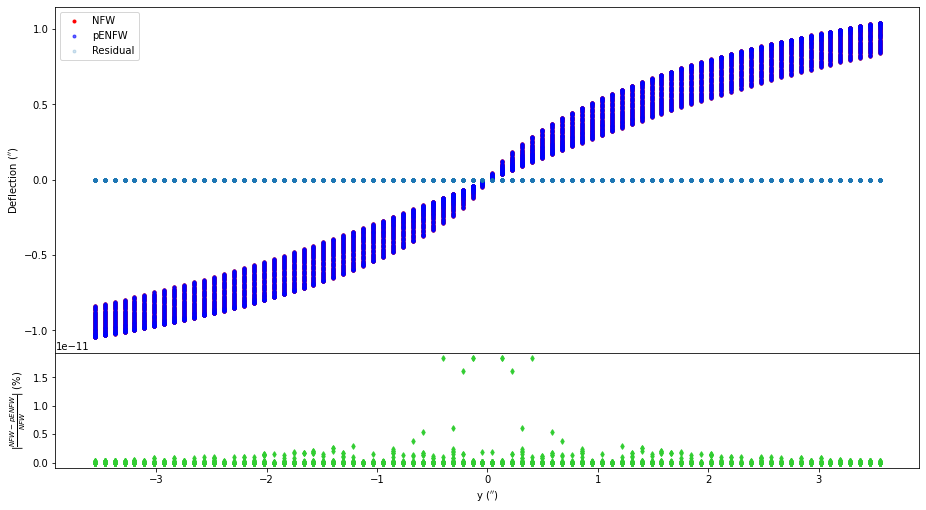

In [9]:
#PLOT
fig1 = plt.figure(figsize=(15,8))

#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(grid[:,0],result_sNFW[:,0], ".r", label="NFW")
plt.plot(grid[:,0],result_pENFW[:,0], ".b", label="pENFW", alpha=0.6)
plt.plot(grid[:,0],(result_sNFW[:,0]-result_pENFW[:,0]), ".", label="Residual", alpha=0.2)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel("Deflection ($''$)")
plt.legend()


#Residual plot
frame2 = fig1.add_axes((.1,.1,.8,.2))        
plt.plot(grid[:,0],100*np.abs((result_sNFW[:,0]-result_pENFW[:,0])/result_sNFW[:,0]),'d',
                 color='LimeGreen', mec='LimeGreen', ms=4)

plt.xlabel("y ($''$)")
plt.ylabel("$|\\frac{NFW - pENFW}{NFW}|$ (%)")

Text(0, 0.5, '$|\\frac{NFW - pENFW}{NFW}|$ (%)')

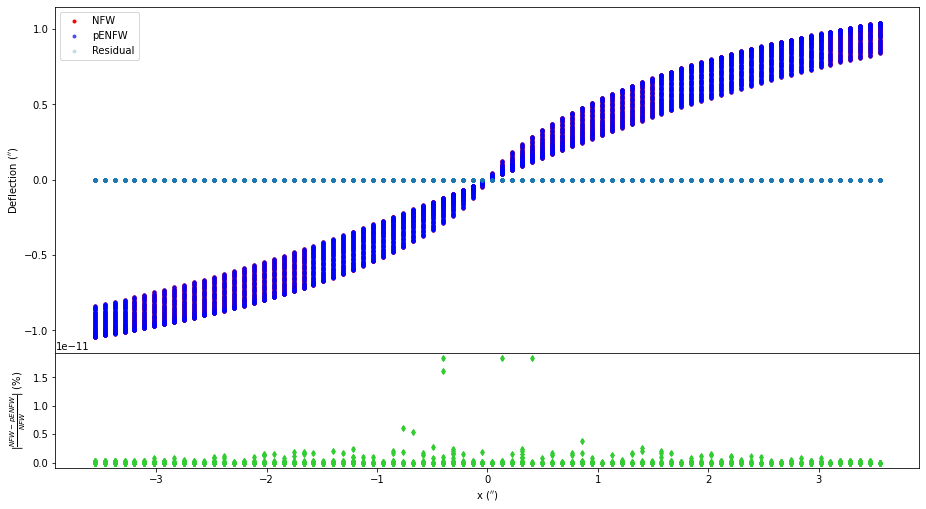

In [10]:
#PLOT
fig1 = plt.figure(figsize=(15,8))

#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(grid[:,1],result_sNFW[:,1], ".r", label="NFW")
plt.plot(grid[:,1],result_pENFW[:,1], ".b", label="pENFW", alpha=0.6)
plt.plot(grid[:,1],(result_sNFW[:,1]-result_pENFW[:,1]), ".", label="Residual", alpha=0.2)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel("Deflection ($''$)")
plt.legend()


#Residual plot
frame2 = fig1.add_axes((.1,.1,.8,.2))        
plt.plot(grid[:,1],100*np.abs((result_sNFW[:,1]-result_pENFW[:,1])/result_sNFW[:,1]),'d',
                 color='LimeGreen', mec='LimeGreen', ms=4)

plt.xlabel("x ($''$)")
plt.ylabel("$|\\frac{NFW - pENFW}{NFW}|$ (%)")

### Classical Elliptical NFW model

In [54]:
q_mass = 0.70     #Axial ratio of the NFW projected mass model 
phi    = 0.0      #Orientation of DM, counterclockwise from x-axis
ell_comps = al.convert.elliptical_comps_from(axis_ratio=q_mass, phi=phi)

eNFW = al.mp.dark_mass_profiles.EllipticalNFW(kappa_s=kappa_, elliptical_comps=ell_comps, scale_radius= r_s)

In [55]:
result_eNFW = eNFW.deflections_from_grid(grid)

### pseudo Elliptical model

A good aproximation for the axial ratio of the potential is assume that the ellipticity of mass is about twice the ellipticity of the potential.

Actually, we have, for small $\epsilon$ [0, 0.25] the approximation $\epsilon \approx \epsilon_\phi$. And then

$\epsilon_\Sigma \approx 2\epsilon_\phi$ and $q_\phi = \frac{1+q_\Sigma}{2}$. Or in terms of $\epsilon$:

$\epsilon = \frac{1 - q_\Sigma}{2}$

Beside that, we assume that the major axis is along the x-axis, so we define the position angle (phi above) as zero.

In [56]:
e = (1-q_mass)/2
pENFW = al.mp.dark_mass_profiles.pseudoEllipticalNFW(kappa_s=kappa_, scale_radius=r_s, e=e)
result_pENFW = pENFW.deflections_from_grid(grid)

Text(0, 0.5, '$|\\frac{eNFW - pENFW}{eNFW}|$ (%)')

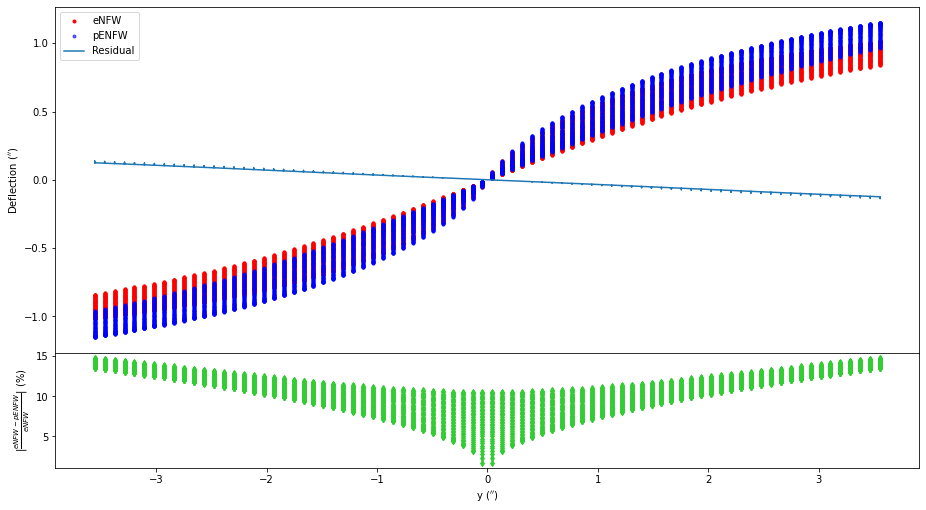

In [57]:
#PLOT
fig1 = plt.figure(figsize=(15,8))

#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(grid[:,0],result_eNFW[:,0], ".r", label="eNFW")
plt.plot(grid[:,0],result_pENFW[:,0], ".b", label="pENFW", alpha=0.6)
plt.plot(grid[:,0],(result_eNFW[:,0]-result_pENFW[:,0]), label="Residual")

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel("Deflection ($''$)")
plt.legend()


#Residual plot
frame2 = fig1.add_axes((.1,.1,.8,.2))        
plt.plot(grid[:,0],100*np.abs ( (result_eNFW[:,0]-result_pENFW[:,0])/result_eNFW[:,0] ),'d',
                 color='LimeGreen', mec='LimeGreen', ms=4)

plt.xlabel("y ($''$)")
plt.ylabel("$|\\frac{eNFW - pENFW}{eNFW}|$ (%)")

Text(0, 0.5, '$|\\frac{eNFW - pENFW}{eNFW}|$ (%)')

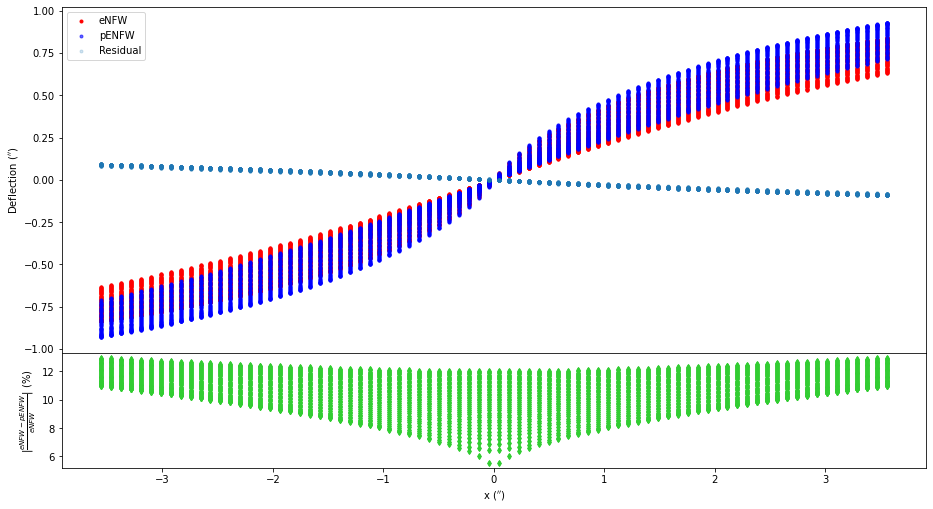

In [58]:
#PLOT
fig1 = plt.figure(figsize=(15,8))

#Plot Data-model
frame1 = fig1.add_axes((.1,.3,.8,.6))
#xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
plt.plot(grid[:,1],result_eNFW[:,1], ".r", label="eNFW")
plt.plot(grid[:,1],result_pENFW[:,1], ".b", label="pENFW", alpha=0.6)
plt.plot(grid[:,1],(result_eNFW[:,1]-result_pENFW[:,1]), ".", label="Residual", alpha=0.2)

frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel("Deflection ($''$)")
plt.legend()


#Residual plot
frame2 = fig1.add_axes((.1,.1,.8,.2))        
plt.plot(grid[:,1],100*np.abs((result_eNFW[:,1]-result_pENFW[:,1])/result_eNFW[:,1]),'d',
                 color='LimeGreen', mec='LimeGreen', ms=4)

plt.xlabel("x ($''$)")
plt.ylabel("$|\\frac{eNFW - pENFW}{eNFW}|$ (%)")